In [50]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [51]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [52]:
import psycopg2
import datetime
import pandas
pandas.set_option('display.max_columns', None)

In [53]:
try:
    conn = psycopg2.connect("dbname='clt_mpe_analysis' user='fuser' host='matm-pg04' password='fuser'")
    print ("Connected to database")
except:
    print ("I am unable to connect to the database")

Connected to database


In [54]:
#import psycopg2
#conn = psycopg2.connect("dbname='db' user='user' host='host' password='pass'"35.213 as arrival_lat, -80.949 as arrival_long,)
cur = conn.cursor()
cur.execute("select gufi,35.213 as arrival_lat, -80.949 as arrival_long,ground_speed,assigned_altitude,assigned_altitude_max,2 * 3961 * asin(sqrt((sin(radians((latitude - 35.21375) / 2))) ^ 2 + cos(radians(latitude)) * cos(radians(35.21375)) * (sin(radians((longitude -(-80.94906)) / 2))) ^ 2)) as distance,latitude,longitude,aircraft_type,source_timestamp,on_actual,(extract( Epoch from (on_actual))-EXTRACT(EPOCH FROM (source_timestamp)))/60 as time_to_land from lk_merged")
data = pd.DataFrame(cur.fetchall(), columns=['gufi','arrival_lat','arrival_long','ground_speed','assigned_altitude',
                                             'assigned_altitude_max','distance_miles','latitude','longitude','aircraft_type','source_timestamp','on_actual','time_to_land'])



# Just in case you have a csv of your data set : Use this 

In [55]:
#data= pd.read_csv("C:/Users/ltyagi/Desktop/Air Prediction/airpred_interval.csv")

In [56]:
data.shape

(126378, 13)

In [57]:
data.head(3)

,gufi,arrival_lat,arrival_long,ground_speed,assigned_altitude,assigned_altitude_max,distance_miles,latitude,longitude,aircraft_type,source_timestamp,on_actual,time_to_land
0,AAL830.AUA.CLT.170604.1641.0113.TFM,35.213,-80.949,451,319,None,1281.476107,19.257500,-70.273056,A320,2017-06-04 20:04:45,2017-06-04 23:08:07,183.366667
1,AAL830.AUA.CLT.170604.1641.0113.TFM,35.213,-80.949,453,320,None,1270.894154,19.397223,-70.340280,A320,2017-06-04 20:05:47,2017-06-04 23:08:07,182.333333
2,AAL830.AUA.CLT.170604.1641.0113.TFM,35.213,-80.949,453,320,None,1262.276081,19.513056,-70.391106,A320,2017-06-04 20:06:49,2017-06-04 23:08:07,181.300000


In [58]:
data.source_timestamp.max()
data.source_timestamp.min()
data.on_actual.max()
data.on_actual.min()

Timestamp('2017-06-29 16:01:48')

Timestamp('2017-06-04 20:04:45')

Timestamp('2017-06-29 17:14:43')

Timestamp('2017-06-04 23:08:07')

In [59]:
data[data.distance_miles <20].shape
data[(data.distance_miles  < 120) & (data.distance_miles > 20)].shape
data[data.distance_miles > 120].shape

(16850, 13)

(28471, 13)

(81057, 13)

In [60]:
data[data['gufi']=='PDT4822.FAY.CLT.170604.1645.0197.TFM'].sort_values(by='source_timestamp',ascending=False)

,gufi,arrival_lat,arrival_long,ground_speed,assigned_altitude,assigned_altitude_max,distance_miles,latitude,longitude,aircraft_type,source_timestamp,on_actual,time_to_land
3727,PDT4822.FAY.CLT.170604.1645.0197.TFM,35.213,-80.949,119,7,None,0.673204,35.217500,-80.938060,DH8C,2017-06-05 17:36:38,2017-06-05 17:36:19,-0.316667
3719,PDT4822.FAY.CLT.170604.1645.0197.TFM,35.213,-80.949,155,14,None,2.894467,35.239166,-80.908330,DH8C,2017-06-05 17:35:35,2017-06-05 17:36:19,0.733333
3717,PDT4822.FAY.CLT.170604.1645.0197.TFM,35.213,-80.949,120,15,None,3.512266,35.245556,-80.900560,DH8C,2017-06-05 17:35:15,2017-06-05 17:36:19,1.066667
3711,PDT4822.FAY.CLT.170604.1645.0197.TFM,35.213,-80.949,174,20,None,5.468375,35.264720,-80.875000,DH8C,2017-06-05 17:34:33,2017-06-05 17:36:19,1.766667
3710,PDT4822.FAY.CLT.170604.1645.0197.TFM,35.213,-80.949,162,22,None,6.185557,35.271667,-80.865555,DH8C,2017-06-05 17:34:14,2017-06-05 17:36:19,2.083333
3703,PDT4822.FAY.CLT.170604.1645.0197.TFM,35.213,-80.949,188,28,None,8.601912,35.293888,-80.832500,DH8C,2017-06-05 17:33:31,2017-06-05 17:36:19,2.800000
3701,PDT4822.FAY.CLT.170604.1645.0197.TFM,35.213,-80.949,174,31,None,9.609391,35.302776,-80.818330,DH8C,2017-06-05 17:33:07,2017-06-05 17:36:19,3.200000
3697,PDT4822.FAY.CLT.170604.1645.0197.TFM,35.213,-80.949,215,39,None,11.895204,35.319164,-80.782500,DH8C,2017-06-05 17:32:28,2017-06-05 17:36:19,3.850000
3694,PDT4822.FAY.CLT.170604.1645.0197.TFM,35.213,-80.949,200,40,None,12.952659,35.322220,-80.761950,DH8C,2017-06-05 17:32:05,2017-06-05 17:36:19,4.233333
3690,PDT4822.FAY.CLT.170604.1645.0197.TFM,35.213,-80.949,257,44,None,13.939656,35.297500,-80.724440,DH8C,2017-06-05 17:31:27,2017-06-05 17:36:19,4.866667


In [61]:
data.gufi.unique()

array(['AAL830.AUA.CLT.170604.1641.0113.TFM',
       'AAL623.PHX.CLT.170604.2036.0162.TFM',
       'JIA5101.MYR.CLT.170604.2049.0046.TFM',
       'ASH6306.IAD.CLT.170604.1951.0069.TFM',
       'DPJ248.PDK.CLT.170604.1645.0041.TFM',
       'SWA5718.SDF.CLT.170604.2131.0123.TFM',
       'PDT4842.ROA.CLT.170604.1950.0112.TFM',
       'AAL1902.MSP.CLT.170604.1633.0067.TFM',
       'AAL2092.RIC.CLT.170604.2055.0132.TFM',
       'AAL1956.DEN.CLT.170604.1918.0008.TFM',
       'AAL1906.PHL.CLT.170604.1802.0059.TFM',
       'JIA5484.CRW.CLT.170604.2256.0011.TFM',
       'AAL1903.ATL.CLT.170604.1903.0015.TFM',
       'AAL600.LGA.CLT.170604.1902.0058.TFM',
       'AAL1892.STL.CLT.170604.1702.0096.TFM',
       'AAL725.DUB.CLT.170604.2057.0014.TFM',
       'JIA5417.GSO.CLT.170604.2105.0012.TFM',
       'AAL787.CDG.CLT.170604.2042.0026.TFM',
       'AAL879.PHL.CLT.170604.1836.0004.TFM',
       'JIA5420.BHM.CLT.170605.0848.0012.TFM',
       'PDT4825.LYH.CLT.170605.0237.0012.TFM',
       'RPA3516.EWR.

(array([  3.42560000e+04,   1.31500000e+04,   1.10370000e+04,
          1.01870000e+04,   8.22000000e+03,   7.43500000e+03,
          6.75500000e+03,   6.29700000e+03,   5.00100000e+03,
          3.09300000e+03,   2.35000000e+03,   2.19300000e+03,
          1.86100000e+03,   1.67100000e+03,   1.05700000e+03,
          8.92000000e+02,   9.53000000e+02,   1.01600000e+03,
          9.87000000e+02,   8.71000000e+02,   7.15000000e+02,
          5.93000000e+02,   5.95000000e+02,   6.06000000e+02,
          6.06000000e+02,   5.81000000e+02,   6.14000000e+02,
          4.45000000e+02,   3.70000000e+02,   3.45000000e+02,
          3.06000000e+02,   3.36000000e+02,   3.30000000e+02,
          2.16000000e+02,   2.57000000e+02,   5.10000000e+01,
          4.10000000e+01,   3.90000000e+01,   3.10000000e+01,
          1.90000000e+01]),
 array([  1.25360989e-01,   6.57713240e+01,   1.31417287e+02,
          1.97063250e+02,   2.62709213e+02,   3.28355176e+02,
          3.94001139e+02,   4.59647102e+02

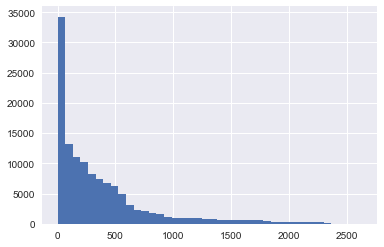

In [62]:
plt.hist(data.distance_miles,bins=40)

In [63]:
data.dtypes

gufi                             object
arrival_lat                      object
arrival_long                     object
ground_speed                      int64
assigned_altitude                 int64
assigned_altitude_max            object
distance_miles                  float64
latitude                        float64
longitude                       float64
aircraft_type                    object
source_timestamp         datetime64[ns]
on_actual                datetime64[ns]
time_to_land                    float64
dtype: object

In [64]:
data.describe()

,ground_speed,assigned_altitude,distance_miles,latitude,longitude,time_to_land
count,126378.000000,126378.000000,126378.000000,126378.000000,126378.000000,126378.000000
mean,372.959653,224.198555,372.381266,36.242246,-83.555769,53.788031
std,108.701285,121.963569,442.145057,4.024322,8.827563,51.073834
min,0.000000,0.000000,0.125361,17.300000,-122.793610,-12.266667
25%,286.000000,105.000000,55.908495,34.848330,-85.335832,16.933333
50%,405.000000,256.000000,227.335341,35.741943,-81.173330,39.633333
75%,463.000000,330.000000,498.314581,37.832500,-80.210556,72.116667
max,615.000000,450.000000,2625.963882,60.100000,-35.866665,329.850000


In [65]:
data.corr()

,ground_speed,assigned_altitude,distance_miles,latitude,longitude,time_to_land
ground_speed,1.000000,0.912992,0.467657,0.107564,-0.290468,0.474348
assigned_altitude,0.912992,1.000000,0.460357,0.158181,-0.167419,0.482573
distance_miles,0.467657,0.460357,1.000000,0.344612,-0.500989,0.988137
latitude,0.107564,0.158181,0.344612,1.000000,0.131200,0.348252
longitude,-0.290468,-0.167419,-0.500989,0.131200,1.000000,-0.440620
time_to_land,0.474348,0.482573,0.988137,0.348252,-0.440620,1.000000


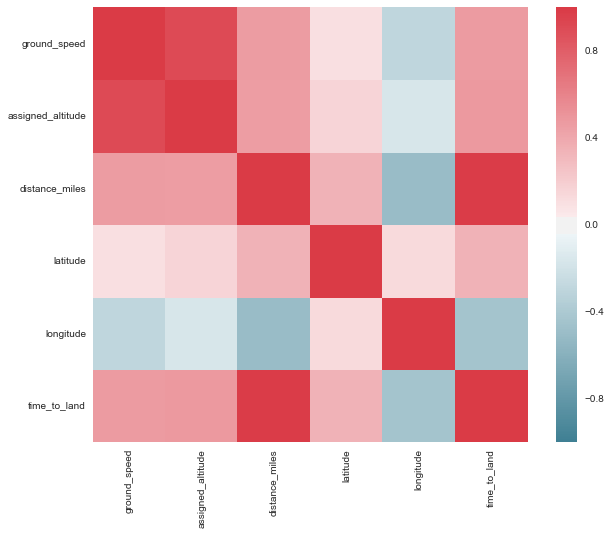

In [66]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [67]:
#data.drop(data.columns[[0,1,2,3,11,12,13]],axis=1,inplace=True)

In [68]:
data.columns

Index(['gufi', 'arrival_lat', 'arrival_long', 'ground_speed',
       'assigned_altitude', 'assigned_altitude_max', 'distance_miles',
       'latitude', 'longitude', 'aircraft_type', 'source_timestamp',
       'on_actual', 'time_to_land'],
      dtype='object')

In [69]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [70]:
## Distance Squared, 
## diff in lat and long respectively for each record (time stamp),
## delta lat , delta_long 

In [71]:
### Feature Engineering two new columns :

data['distance_sqr']=(data['distance_miles'])**2
data['distance_log']=np.log(data['distance_miles'])
data.head(3)

,gufi,arrival_lat,arrival_long,ground_speed,assigned_altitude,assigned_altitude_max,distance_miles,latitude,longitude,aircraft_type,source_timestamp,on_actual,time_to_land,distance_sqr,distance_log
0,AAL830.AUA.CLT.170604.1641.0113.TFM,35.213,-80.949,451,319,None,1281.476107,19.257500,-70.273056,A320,2017-06-04 20:04:45,2017-06-04 23:08:07,183.366667,1.642181e+06,7.155768
1,AAL830.AUA.CLT.170604.1641.0113.TFM,35.213,-80.949,453,320,None,1270.894154,19.397223,-70.340280,A320,2017-06-04 20:05:47,2017-06-04 23:08:07,182.333333,1.615172e+06,7.147476
2,AAL830.AUA.CLT.170604.1641.0113.TFM,35.213,-80.949,453,320,None,1262.276081,19.513056,-70.391106,A320,2017-06-04 20:06:49,2017-06-04 23:08:07,181.300000,1.593341e+06,7.140672


{'boxes': [<matplotlib.lines.Line2D at 0x11583390>],
 'caps': [<matplotlib.lines.Line2D at 0xf6f1e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x115a1780>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xf70e898>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11583d30>,
  <matplotlib.lines.Line2D at 0x11583f60>]}

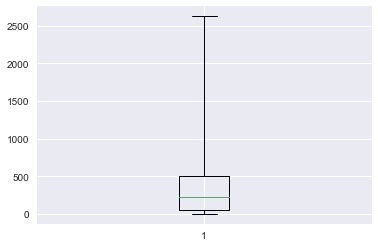

In [72]:
plt.figure()
plt.boxplot(data['distance_miles'],whis='range')

In [73]:
#data=data[data['distance']<1500]

# just to remove a bit of leverage techincally becuase of huge distances , and removing few outliers

# Features and Targets 

In [74]:
X=data.ix[:,[3,4,6,7,8,13,14]]
X.head(1)
Y=data.ix[:,'time_to_land']
Y.head(2)

,ground_speed,assigned_altitude,distance_miles,latitude,longitude,distance_sqr,distance_log
0,451,319,1281.476107,19.2575,-70.273056,1.642181e+06,7.155768


0    183.366667
1    182.333333
Name: time_to_land, dtype: float64

In [75]:
data.columns

Index(['gufi', 'arrival_lat', 'arrival_long', 'ground_speed',
       'assigned_altitude', 'assigned_altitude_max', 'distance_miles',
       'latitude', 'longitude', 'aircraft_type', 'source_timestamp',
       'on_actual', 'time_to_land', 'distance_sqr', 'distance_log'],
      dtype='object')

# Model Fitting 

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
reg=linear_model.LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# MODEL Evaluation

In [78]:
for a,b  in zip(X.columns, reg.coef_):
    print(a+':' +' ' +str(round(b,6)))
print('R Squared Value ',reg.score(X_test,Y_test))

ground_speed: -0.036597
assigned_altitude: 0.008909
distance_miles: 0.104092
latitude: -0.165432
longitude: 0.34831
distance_sqr: 1e-06
distance_log: 5.373399
R Squared Value  0.987326211898


In [79]:
print('R Squared Value ',reg.score(X_test,Y_test))

R Squared Value  0.987326211898


In [80]:
print('Trainning Error Evaluation')
print('MSE for the Training Model :', mean_squared_error(y_true=Y_train,y_pred=reg.predict(X_train)))
print('Mean absolute error for Training :',mean_absolute_error(y_true=Y_train,y_pred=reg.predict(X_train)))
print('\nTesting Error Evaluation')
print('MSE for the Test Model :',mean_squared_error(y_true=Y_test,y_pred=reg.predict(X_test)))
print('Mean absolute error for Test :',mean_absolute_error(y_true=Y_test,y_pred=reg.predict(X_test)))

Trainning Error Evaluation
MSE for the Training Model : 34.0638263885
Mean absolute error for Training : 4.10155342993

Testing Error Evaluation
MSE for the Test Model : 33.2318196254
Mean absolute error for Test : 4.09144277372


In [81]:
y_hat=reg.predict(X_test)
error=abs(y_hat-Y_test)
error_df=pd.DataFrame({'INDEX':error.index, 'Error':error.values})
error_df=error_df.set_index('INDEX')
error_df.head(2)

,Error
INDEX,
71714,4.258943
109144,0.526160


In [82]:
X_test.count()
error_df.count()

ground_speed         41705
assigned_altitude    41705
distance_miles       41705
latitude             41705
longitude            41705
distance_sqr         41705
distance_log         41705
dtype: int64

Error    41705
dtype: int64

In [83]:
final=pd.concat([X_test,error_df],axis=1)
final.head(2)

,ground_speed,assigned_altitude,distance_miles,latitude,longitude,distance_sqr,distance_log,Error
INDEX,,,,,,,,
71714,228,49,30.836864,35.656390,-81.01667,950.912212,3.428711,4.258943
109144,381,280,114.192339,36.587776,-79.81722,13039.890307,4.737884,0.526160


In [84]:
final['distance_group'] = 'close'
# Set Age_Group value for all row indexes which Age are greater than 40
final['distance_group'][(final['distance_miles'] > 20) & (final['distance_miles'] <150)] = 'Mid'
# Set Age_Group value for all row indexes which Age are greater than 18 and < 40
final['distance_group'][final['distance_miles'] > 150] = 'Far'
# Set Age_Group value for all row indexes which Age are less than 18


distance_group
Far      Axes(0.125,0.125;0.775x0.755)
Mid      Axes(0.125,0.125;0.775x0.755)
close    Axes(0.125,0.125;0.775x0.755)
Name: Error, dtype: object

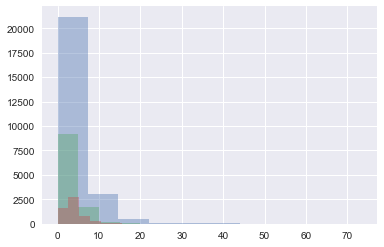

In [85]:
final.groupby("distance_group").Error.hist(alpha=0.4,grid=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000139AFBA8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000013868160>]], dtype=object)

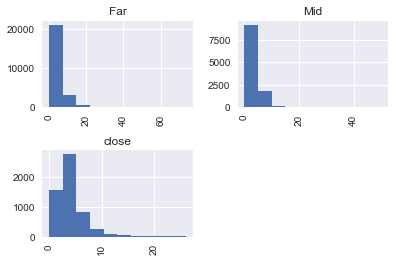

In [86]:
final['Error'].hist(by=final['distance_group'])

# Three Subsets for Distances :

In [87]:
data_close = data[data.distance_miles <20]
data_mid   = data[(data.distance_miles  < 150) & (data.distance_miles >20)]
data_Far   =  data[data.distance_miles > 150]

In [88]:
data_close.gufi.unique().shape

(953,)

In [89]:
data_close.shape
data_mid.shape
data_Far.shape
data.shape

(16850, 15)

(33846, 15)

(75682, 15)

(126378, 15)

In [90]:
data_close[data_close.gufi=='AAL1153.JFK.CLT.170626.1215.0172.TFM'].sort_values(by='source_timestamp',ascending=False)

,gufi,arrival_lat,arrival_long,ground_speed,assigned_altitude,assigned_altitude_max,distance_miles,latitude,longitude,aircraft_type,source_timestamp,on_actual,time_to_land,distance_sqr,distance_log
112183,AAL1153.JFK.CLT.170626.1215.0172.TFM,35.213,-80.949,147,8,None,1.369467,35.228058,-80.965830,B752,2017-06-27 14:49:16,2017-06-27 14:48:37,-0.650000,1.875439,0.314421
112171,AAL1153.JFK.CLT.170626.1215.0172.TFM,35.213,-80.949,148,12,None,2.144819,35.185000,-80.963330,B752,2017-06-27 14:48:14,2017-06-27 14:48:37,0.383333,4.600247,0.763055
112172,AAL1153.JFK.CLT.170626.1215.0172.TFM,35.213,-80.949,145,13,None,2.655621,35.177223,-80.963610,B752,2017-06-27 14:48:04,2017-06-27 14:48:37,0.550000,7.052321,0.976678
112159,AAL1153.JFK.CLT.170626.1215.0172.TFM,35.213,-80.949,168,19,None,4.813660,35.144726,-80.960270,B752,2017-06-27 14:47:12,2017-06-27 14:48:37,1.416667,23.171318,1.571458
112157,AAL1153.JFK.CLT.170626.1215.0172.TFM,35.213,-80.949,170,22,None,5.597117,35.133335,-80.960556,B752,2017-06-27 14:46:57,2017-06-27 14:48:37,1.666667,31.327723,1.722252
112148,AAL1153.JFK.CLT.170626.1215.0172.TFM,35.213,-80.949,183,29,None,8.180895,35.095554,-80.956110,B752,2017-06-27 14:46:10,2017-06-27 14:48:37,2.450000,66.927038,2.101802
112146,AAL1153.JFK.CLT.170626.1215.0172.TFM,35.213,-80.949,175,31,None,9.026364,35.083332,-80.956665,B752,2017-06-27 14:45:56,2017-06-27 14:48:37,2.683333,81.475247,2.200150
112136,AAL1153.JFK.CLT.170626.1215.0172.TFM,35.213,-80.949,189,38,None,11.628170,35.045555,-80.950830,B752,2017-06-27 14:45:08,2017-06-27 14:48:37,3.483333,135.214340,2.453431
112137,AAL1153.JFK.CLT.170626.1215.0172.TFM,35.213,-80.949,181,39,None,12.031548,35.039722,-80.951110,B752,2017-06-27 14:45:01,2017-06-27 14:48:37,3.600000,144.758138,2.487532
112128,AAL1153.JFK.CLT.170626.1215.0172.TFM,35.213,-80.949,203,49,None,15.558387,34.989445,-80.926670,B752,2017-06-27 14:44:01,2017-06-27 14:48:37,4.600000,242.063403,2.744600


In [91]:
data_Far.gufi.unique()

array(['AAL830.AUA.CLT.170604.1641.0113.TFM',
       'AAL623.PHX.CLT.170604.2036.0162.TFM',
       'JIA5101.MYR.CLT.170604.2049.0046.TFM',
       'ASH6306.IAD.CLT.170604.1951.0069.TFM',
       'DPJ248.PDK.CLT.170604.1645.0041.TFM',
       'SWA5718.SDF.CLT.170604.2131.0123.TFM',
       'AAL1902.MSP.CLT.170604.1633.0067.TFM',
       'AAL2092.RIC.CLT.170604.2055.0132.TFM',
       'AAL1956.DEN.CLT.170604.1918.0008.TFM',
       'AAL1906.PHL.CLT.170604.1802.0059.TFM',
       'JIA5484.CRW.CLT.170604.2256.0011.TFM',
       'AAL1903.ATL.CLT.170604.1903.0015.TFM',
       'AAL600.LGA.CLT.170604.1902.0058.TFM',
       'AAL1892.STL.CLT.170604.1702.0096.TFM',
       'AAL725.DUB.CLT.170604.2057.0014.TFM',
       'AAL787.CDG.CLT.170604.2042.0026.TFM',
       'AAL879.PHL.CLT.170604.1836.0004.TFM',
       'JIA5420.BHM.CLT.170605.0848.0012.TFM',
       'PDT4825.LYH.CLT.170605.0237.0012.TFM',
       'RPA3516.EWR.CLT.170605.1203.0029.TFM',
       'EJA219.IAD.CLT.170605.1109.0018.TFM',
       'AAL2069.CHS.C

In [92]:
X1=data_close.ix[:,[3,4,6,7,8,13,14]]
X1.head(1)
Y1=data_close.ix[:,'time_to_land']
Y1.head(2)

,ground_speed,assigned_altitude,distance_miles,latitude,longitude,distance_sqr,distance_log
325,268,105,19.924373,34.9525,-81.09778,396.980652,2.991944


325    19.883333
330    17.366667
Name: time_to_land, dtype: float64

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.33, random_state=42)
reg=linear_model.LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [94]:
for a,b  in zip(X.columns, reg.coef_):
    print(a+':' +' ' +str(round(b,6)))
    
print('\n R Squared Value ',reg.score(X_test,Y_test))

ground_speed: 0.003446
assigned_altitude: 0.116276
distance_miles: -0.110903
latitude: 0.134284
longitude: -0.510313
distance_sqr: 0.00568
distance_log: 0.549706

 R Squared Value  0.775241002213


In [95]:
print('Trainning Error Evaluation')
print('MSE for the Training Model :', mean_squared_error(y_true=Y_train,y_pred=reg.predict(X_train)))
print('Mean absolute error for Training :',mean_absolute_error(y_true=Y_train,y_pred=reg.predict(X_train)))
print('\nTesting Error Evaluation')
print('MSE for the Test Model :',mean_squared_error(y_true=Y_test,y_pred=reg.predict(X_test)))
print('Mean absolute error for Test :',mean_absolute_error(y_true=Y_test,y_pred=reg.predict(X_test)))

Trainning Error Evaluation
MSE for the Training Model : 3.81330544665
Mean absolute error for Training : 1.05718716794

Testing Error Evaluation
MSE for the Test Model : 4.20383949078
Mean absolute error for Test : 1.08365511245


In [96]:
X2=data_mid.ix[:,[3,4,6,7,8,13,14]]
X2.head(1)
Y2=data_mid.ix[:,'time_to_land']
Y2.head(2)

,ground_speed,assigned_altitude,distance_miles,latitude,longitude,distance_sqr,distance_log
86,307,135,147.221035,33.766945,-79.053055,21674.033219,4.991935


86    83.883333
89    82.850000
Name: time_to_land, dtype: float64

In [97]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, test_size=0.33, random_state=42)
reg=linear_model.LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [99]:
for a,b  in zip(X.columns, reg.coef_):
    print(a+':' +' ' +str(round(b,6)))
    
print('\n R Squared Value ',reg.score(X_test,Y_test))

ground_speed: -0.029978
assigned_altitude: 0.015446
distance_miles: 0.101517
latitude: -0.906211
longitude: 0.193046
distance_sqr: -0.000111
distance_log: 6.997134

 R Squared Value  0.701109325049


In [100]:
X3=data_Far.ix[:,[3,4,6,7,8,13,14]]
X3.head(1)
Y3=data_Far.ix[:,'time_to_land']
Y3.head(2)

,ground_speed,assigned_altitude,distance_miles,latitude,longitude,distance_sqr,distance_log
0,451,319,1281.476107,19.2575,-70.273056,1.642181e+06,7.155768


0    183.366667
1    182.333333
Name: time_to_land, dtype: float64

In [101]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X3, Y3, test_size=0.33, random_state=42)
reg=linear_model.LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [103]:
for a,b  in zip(X.columns, reg.coef_):
    print(a+':' +' ' +str(round(b,6)))
    
print('\n R Squared Value ',reg.score(X_test,Y_test))

ground_speed: -0.055622
assigned_altitude: 0.015481
distance_miles: 0.106412
latitude: -0.151239
longitude: 0.315468
distance_sqr: 1e-06
distance_log: 4.553142

 R Squared Value  0.984361452625


In [104]:
print('Trainning Error Evaluation')
print('MSE for the Training Model :', mean_squared_error(y_true=Y_train,y_pred=reg.predict(X_train)))
print('Mean absolute error for Training :',mean_absolute_error(y_true=Y_train,y_pred=reg.predict(X_train)))
print('\nTesting Error Evaluation')
print('MSE for the Test Model :',mean_squared_error(y_true=Y_test,y_pred=reg.predict(X_test)))
print('Mean absolute error for Test :',mean_absolute_error(y_true=Y_test,y_pred=reg.predict(X_test)))

Trainning Error Evaluation
MSE for the Training Model : 41.4336514029
Mean absolute error for Training : 4.45307775966

Testing Error Evaluation
MSE for the Test Model : 40.094274119
Mean absolute error for Test : 4.45515490806
